In [1]:
# 모듈 실행
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
DATA='../DATA/지연 통계_2024.xlsx'

In [10]:
DATA= pd.read_excel(DATA)

DATA.to_csv('DATA_24.csv', index=False, encoding='utf-8-sig')

In [11]:
DATA

,공항명,출/도착,운항(편),기상,연결,정비,여객 및 화물처리,운항기준 및 승무원,항공교통흐름,지상조업,공항 및 출입국 절차,기타,계
0,김포,출발,"64,129",316,"9,733",636,429,218,475,100,"1,062",109,"13,078"
1,김포,도착,"63,984",179,"12,214",284,610,67,267,28,"1,408",88,"15,145"
2,김포,계,"128,113",495,"21,947",920,"1,039",285,742,128,"2,470",197,"28,223"
3,무안,출발,692,2,87,3,0,2,0,0,5,2,101
4,무안,도착,691,10,132,2,1,0,15,0,4,0,164
5,무안,계,"1,383",12,219,5,1,2,15,0,9,2,265
6,합계,NaN,"472,353","2,301","77,615","2,868","2,534",903,"4,118",366,"8,582","1,179","100,466"


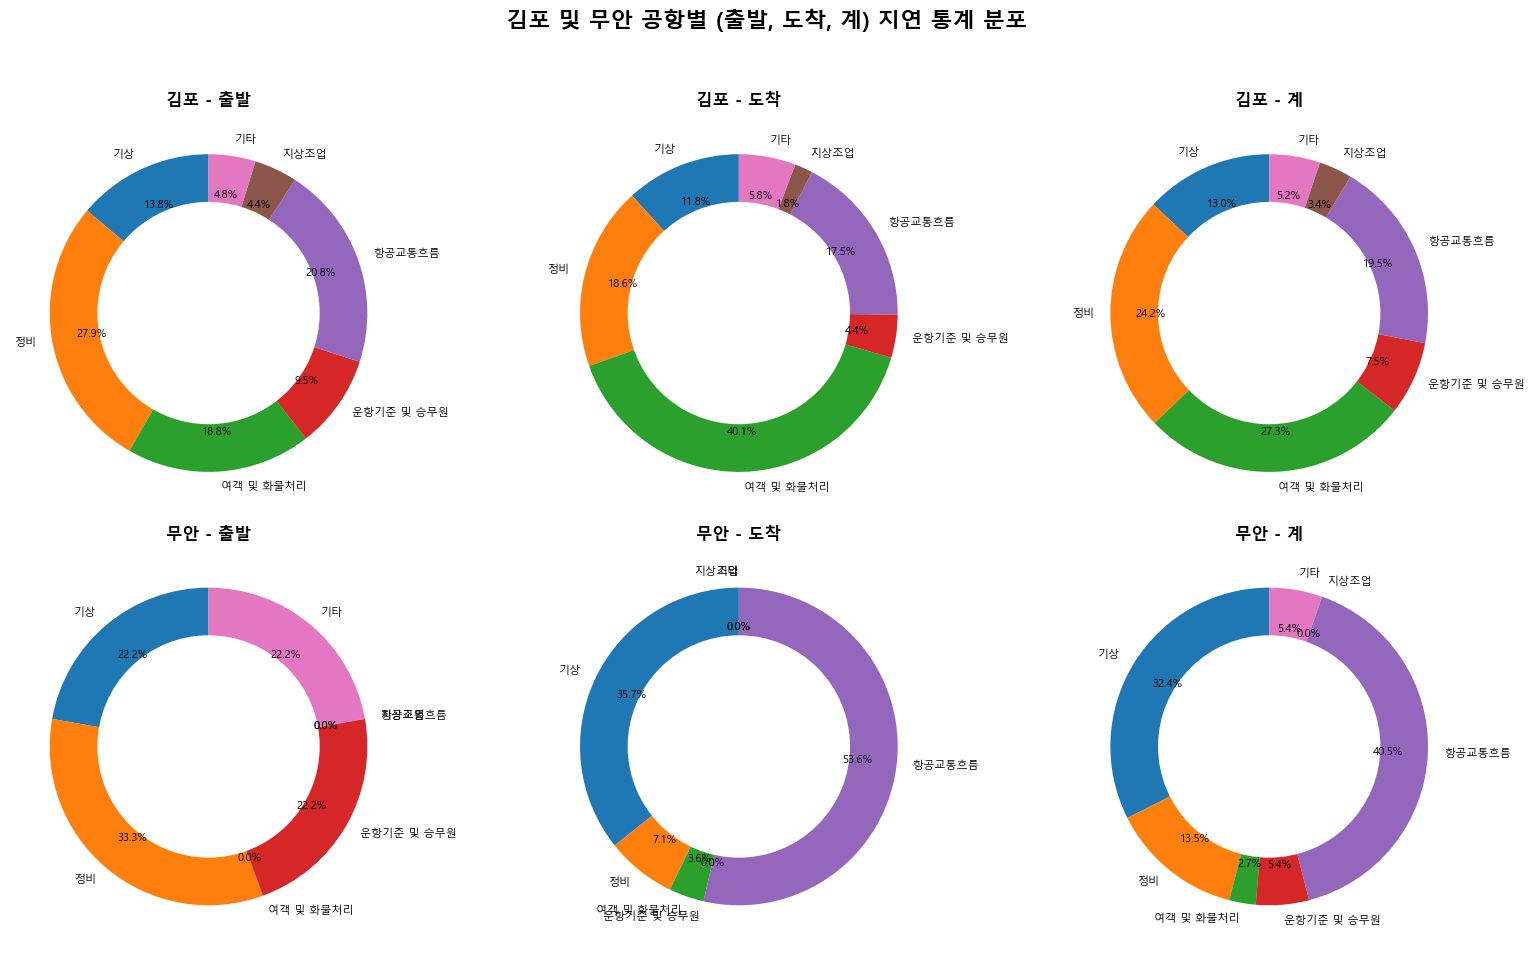

In [21]:
# 연결, 공항 및 출입국 절차 삭제

# 1. 예시 데이터 생성 (김포와 무안의 출발, 도착, 계 데이터)
data = {
    "공항명": ["김포", "김포", "김포", "무안", "무안", "무안"],
    "출/도착": ["출발", "도착", "계", "출발", "도착", "계"],
    # 숫자 데이터는 쉼표 없이 정수형으로 입력 (쉼표가 있다면 int(v.replace(',', '')) 등으로 처리)
    "기상": [316, 179, 495, 2, 10, 12],
    "정비": [636, 284, 920, 3, 2, 5],
    "여객 및 화물처리": [429, 610, 1039, 0, 1, 1],
    "운항기준 및 승무원": [218, 67, 285, 2, 0, 2],
    "항공교통흐름": [475, 267, 742, 0, 15, 15],
    "지상조업": [100, 28, 128, 0, 0, 0],
    "기타": [109, 88, 197, 2, 0, 2]
}

df = pd.DataFrame(data)

# 2. 도넛 차트에 사용할 범주(카테고리) 지정  
# 여기서는 '계' 열은 전체 합계이므로 제외하고, 각 원인의 분포를 보겠습니다.
categories = [
    "기상", "정비", "여객 및 화물처리",
    "운항기준 및 승무원", "항공교통흐름", "지상조업",
     "기타"
]

# 3. 6개의 도넛 차트를 하나의 Figure 내에 2행 3열로 배치하여 그리기
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

for i, (idx, row) in enumerate(df.iterrows()):
    # 각 행의 카테고리 값 추출 (numpy array)
    values = row[categories].values
    # 현재 subplot
    ax = axs[i // 3, i % 3]
    
    # 도넛 차트 그리기: plt.pie() 사용
    wedges, texts, autotexts = ax.pie(
        values,
        labels=categories,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.75,
        textprops={'fontsize': 8}
    )
    
    # 중앙에 흰색 원 추가하여 도넛 효과 부여
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    
    # 각 차트 제목: "공항명 - 출/도착" 형태로 설정
    title = f"{row['공항명']} - {row['출/도착']}"
    ax.set_title(title, fontsize=12, fontweight='bold')
    
    # 원형 차트의 글씨가 겹칠 수 있으므로, 필요에 따라 레이블 숨기거나 회전 옵션 추가 가능

plt.suptitle("김포 및 무안 공항별 (출발, 도착, 계) 지연 통계 분포", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

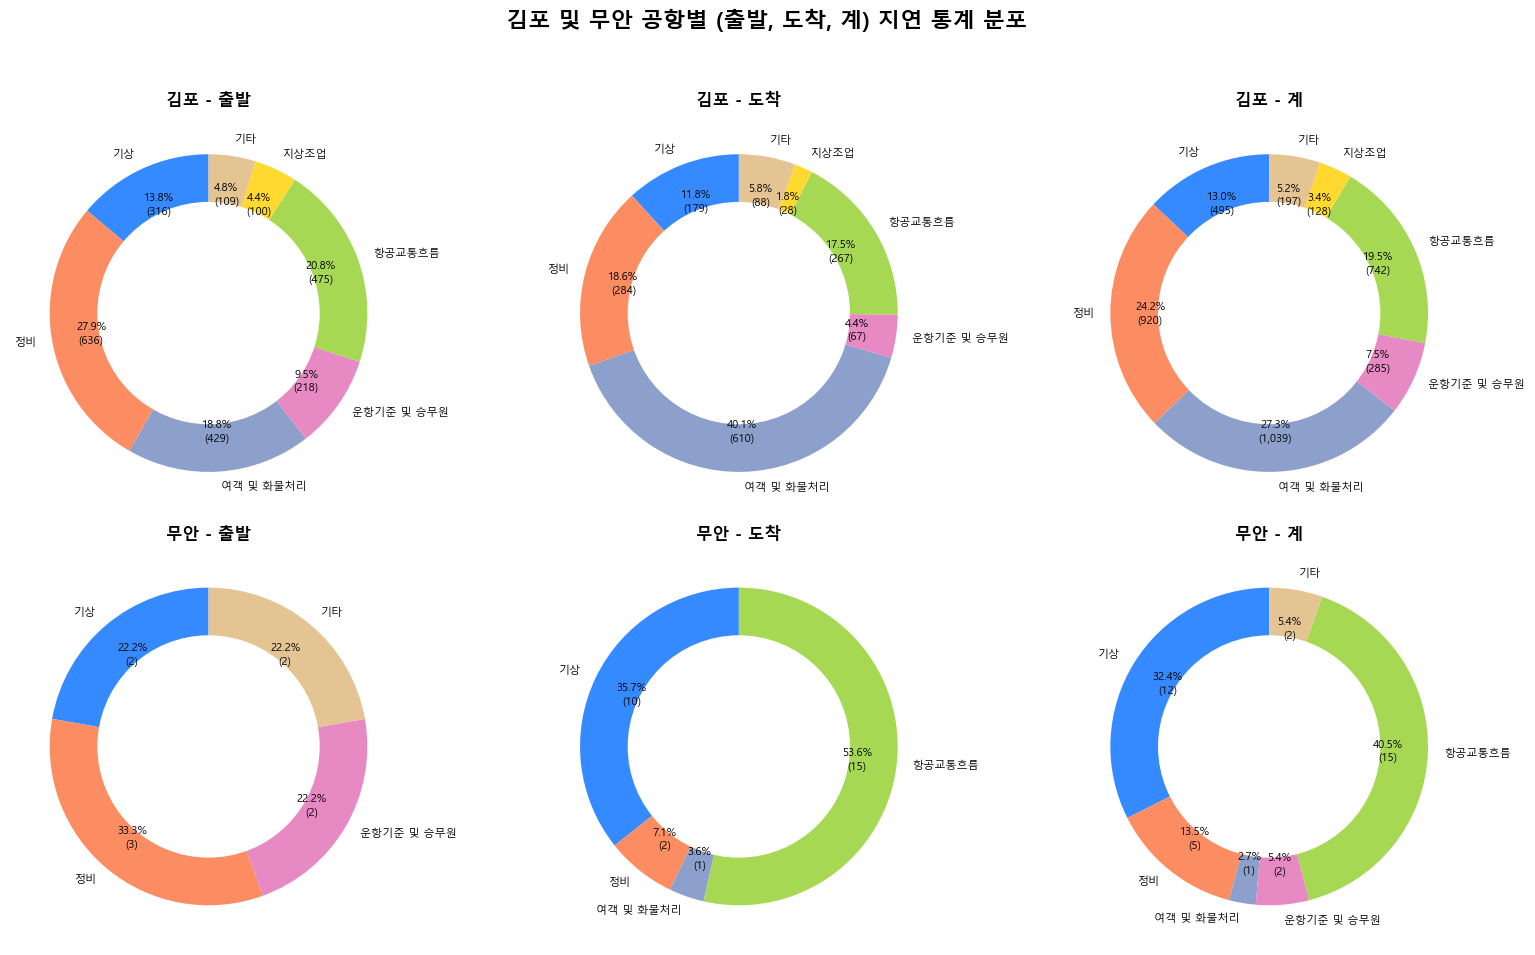

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 예시 데이터 생성 (김포와 무안의 출발, 도착, 계 데이터)
data = {
    "공항명": ["김포", "김포", "김포", "무안", "무안", "무안"],
    "출/도착": ["출발", "도착", "계", "출발", "도착", "계"],
    # "연결"과 "공항 및 출입국 절차"는 삭제됨
    "기상": [316, 179, 495, 2, 10, 12],
    "정비": [636, 284, 920, 3, 2, 5],
    "여객 및 화물처리": [429, 610, 1039, 0, 1, 1],
    "운항기준 및 승무원": [218, 67, 285, 2, 0, 2],
    "항공교통흐름": [475, 267, 742, 0, 15, 15],
    "지상조업": [100, 28, 128, 0, 0, 0],
    "기타": [109, 88, 197, 2, 0, 2]
}
df = pd.DataFrame(data)

# 2. 도넛 차트에 사용할 범주(카테고리) 지정  
categories = [
    "기상", "정비", "여객 및 화물처리",
    "운항기준 및 승무원", "항공교통흐름", "지상조업",
    "기타"
]

# 3. 각 카테고리에 대응하는 색상 리스트 (원하는 색상으로 수정)
# 예시 색상: 7개 항목에 대해 지정
colors_list = ["#368AFF", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494"]

# 4. 사용자 정의 autopct 함수 (값이 0인 경우 빈 문자열 반환)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        absolute = int(round(pct / 100. * total))
        return '' if absolute == 0 else f'{pct:.1f}%\n({absolute:,d})'
    return my_autopct

# 5. 6개의 도넛 차트를 하나의 Figure 내에 2행 3열로 배치하여 그리기
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

for i, (idx, row) in enumerate(df.iterrows()):
    # 각 행의 카테고리 값 추출 (numpy array)
    values = row[categories].values
    # 0인 값은 제외: 필터링
    mask = values != 0
    filtered_values = values[mask]
    # 원래 카테고리 순서를 유지하며, 0이 아닌 항목만 선택
    filtered_categories = [cat for cat, val in zip(categories, values) if val != 0]
    # filtered_categories에 해당하는 색상 선택:
    # 원래 colors_list의 순서와 categories의 순서가 일치하므로,
    # 0이 아닌 항목에 해당하는 색상을 추출
    filtered_colors = [color for color, (cat, val) in zip(colors_list, zip(categories, values)) if val != 0]
    
    # 현재 subplot 선택
    ax = axs[i // 3, i % 3]
    
    # 도넛 차트 그리기: plt.pie() 사용 (filtered 데이터와 색상 사용)
    wedges, texts, autotexts = ax.pie(
        filtered_values,
        labels=filtered_categories,
        autopct=make_autopct(filtered_values),
        colors=filtered_colors,
        startangle=90,
        pctdistance=0.75,
        textprops={'fontsize': 8}
    )
    
    # 중앙에 흰색 원 추가하여 도넛 효과 부여
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    
    # 각 차트 제목: "공항명 - 출/도착" 형태로 설정
    title = f"{row['공항명']} - {row['출/도착']}"
    ax.set_title(title, fontsize=12, fontweight='bold')

plt.suptitle("김포 및 무안 공항별 (출발, 도착, 계) 지연 통계 분포", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
